In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams["figure.figsize"] = (8,8)


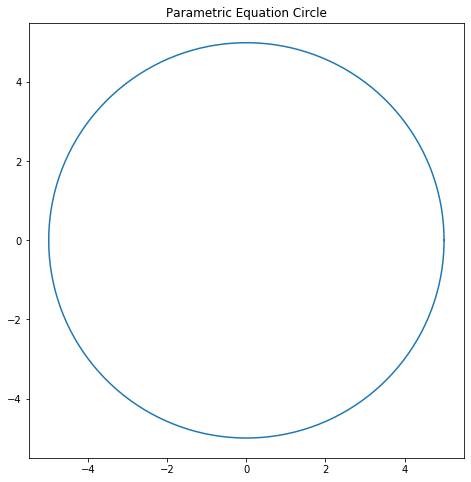

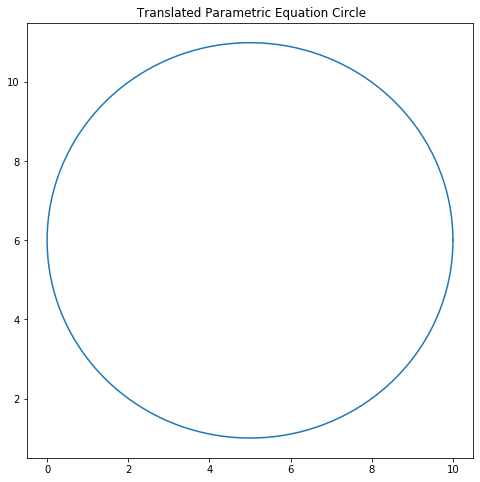

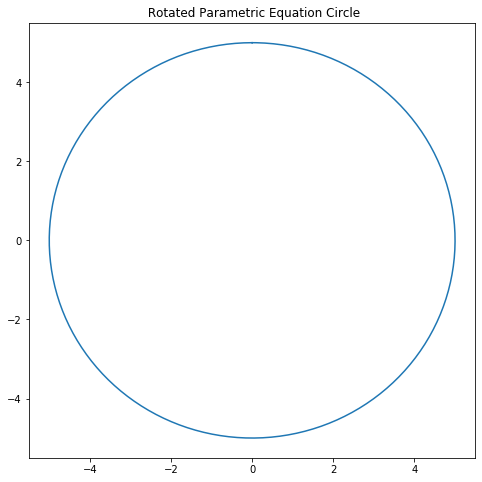

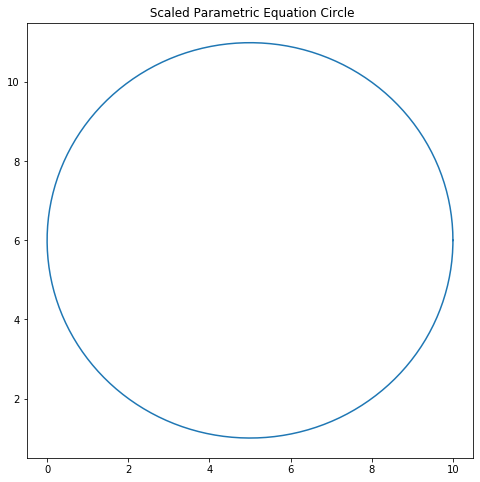

In [65]:
angle = np.linspace( 0 , 2 * np.pi , 300 ) 
radius = 5
x = radius * np.cos( angle )
y = radius * np.sin( angle )
figure, axes = plt.subplots( 1) 
axes.plot( x, y ) 
axes.set_aspect( 1 ) 
plt.title( 'Parametric Equation Circle' ) 
plt.show() 

data =[]
for i in range(0,len(x)):
    data.append([x[i], y[i]])


def translate(our_data, translate_x, translate_y):
    new_data=[]
    for element in our_data:

        new_data.append([element[0]+ translate_x, element[1]+ translate_y])
    return new_data 

def rotate(our_data, theta):
    new_data=[]
    for element in our_data:
        new_data.append([element[0]*math.cos(theta) - element[1]*math.sin(theta), element[0]*math.sin(theta) + element[1]*math.cos(theta)])
    return new_data    


def scaling(our_data, scale_factor):
    new_data=[]
    for element in our_data:
        new_data.append([element[0]*scale_factor, element[1]*scale_factor])
    return new_data    

data_translate = translate(data, 5,6)
data_trans_x = [element[0] for element in data_translate]
data_trans_y = [element[1] for element in data_translate]

data_rotate  = rotate(data, math.pi/2)
data_ro_x = [element[0] for element in data_rotate]
data_ro_y = [element[1] for element in data_rotate]

data_scale = scaling(data, 2)
data_scale_x = [element[0] for element in data_translate]
data_scale_y = [element[1] for element in data_translate]

plt.plot( data_trans_x, data_trans_y ) 
plt.title( ' Translated Parametric Equation Circle' ) 
plt.show() 

plt.plot( data_ro_x, data_ro_y )  
plt.title( ' Rotated Parametric Equation Circle' ) 
plt.show() 

plt.plot( data_scale_x, data_scale_y ) 
plt.title( ' Scaled Parametric Equation Circle' ) 
plt.show() 

In [61]:

def create_complex_matrix( length ):
    arr2D = []
    c =complex(0,1)
    for i in range(0,length):
        arr2D.append([])
        for j in range(0,length):
            arr2D[i].append(np.round(np.exp(c*2*3.14*i*j/length)))
    return arr2D

def projection_on_complex(our_data):
    A_u = np.dot(create_complex_matrix(len(our_data)), our_data)     
    X = [x.real for x in A_u]
    Y = [x.imag for x in A_u]
    plt.plot(X, Y)
    plt.title("complex")
    return A_u

def back_to_normal(new_basis_data, percent):
    sigma = int(percent*(len(new_basis_data))/100)
    a_k = np.dot(np.linalg.inv(create_complex_matrix(len(new_basis_data[:sigma]))), new_basis_data[:sigma])
    return a_k


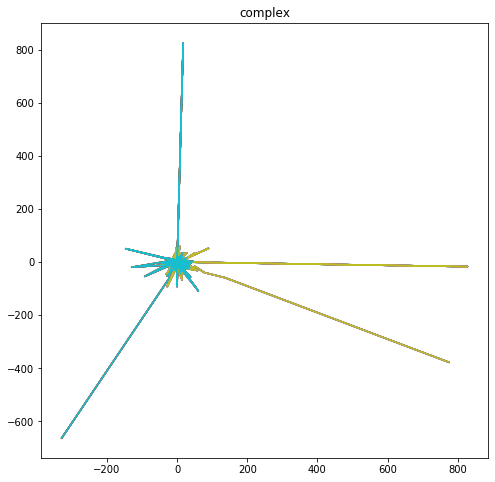

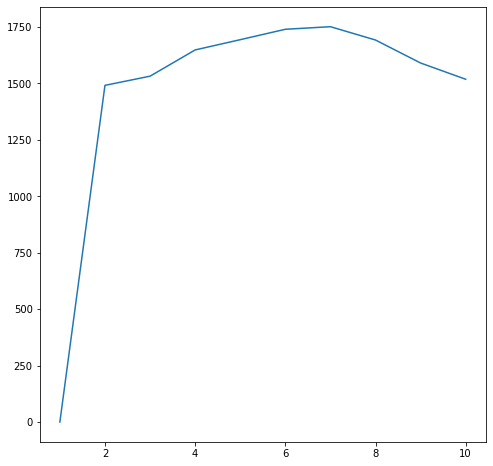

In [62]:
def overall(data):
    error = []
    for i in [100,90,80,70,60,50,40,30,20,10]:
        changed_data = projection_on_complex(data)
        normal_data = back_to_normal(changed_data, i)
        error.append(np.sum(np.absolute(normal_data - data[:len(normal_data)])))
    plt.figure()    
    plt.plot(range(1, len(error)+1), error)
    
overall(data)


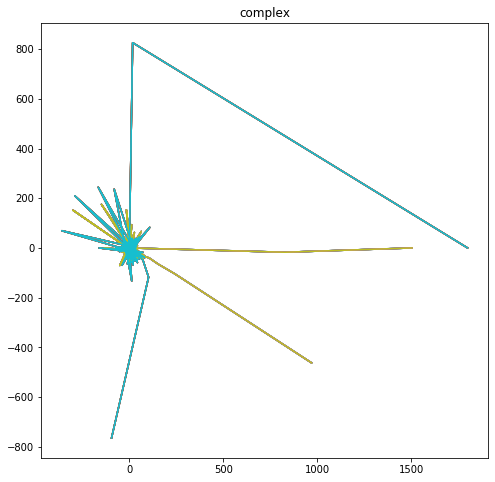

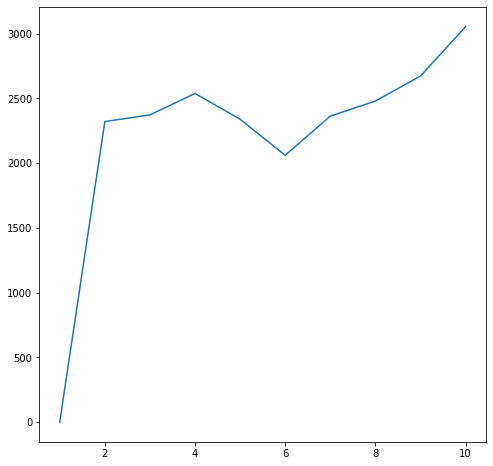

In [63]:
overall(data_translate)

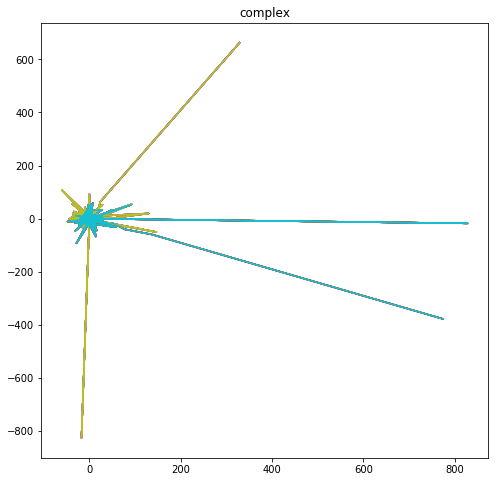

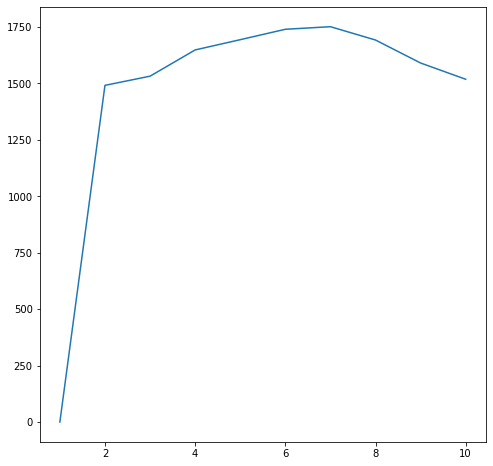

In [64]:
overall(data_rotate)

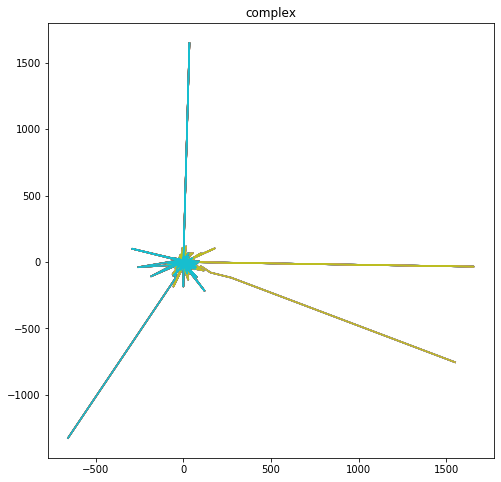

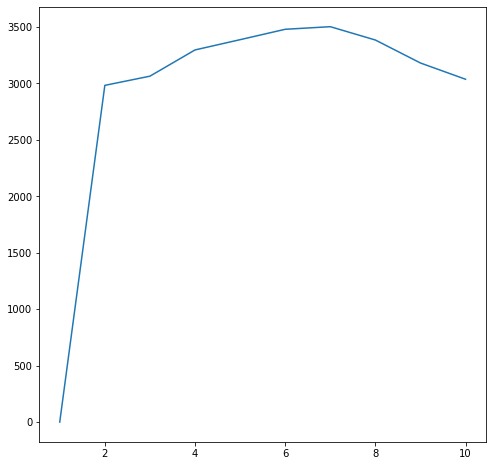

In [66]:
overall(data_scale)